<img src="health.jpg">

# Objective

Hospital readmission rates for certain conditions are now considered an indicator of hospital quality, and also affect the cost of care adversely. Hospital readmissions of diabetic patients are expensive as hospitals face penalties if their readmission rate is higher than expected and reflects the inadequacies in health care system. For these reasons, it is important for the hospitals to improve focus on reducing readmission rates. Identify the key factors that influence readmission for diabetes and to predict the probability of patient readmission.

# Data

> The dataset chosen is that available on the UCI [website](http://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008) which contains the patient data for the past 10 years for 130 hospitals. 

> The dataset represents 10 years (1999-2008) of clinical care hospitals and integrated delivery networks information. It includes over 50 features representing patient and hospital outcomes. 

> The data contains attributes such as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

# Loading the data

In [160]:
# Import libraries needed,
import IPython
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from statistics import mode


In [161]:
#Loading the data using pandas,
dataoriginal = pd.read_csv("C://Users//Sanke//diabetic_data.csv")
dataoriginal.shape

(101766, 50)

In [162]:
# Check the top 5 rows
dataoriginal.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


We see the dataet has more then 101k records and 50 columns.

In [163]:
# Lets see the datatypes present in the dataset.
dataoriginal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

## Missing Values


We can start analysis by looking at the percentage of missing values in each column. Missing values are fine when we do Exploratory Data Analysis, but they will have to be filled in for machine learning methods.

Following is a function that calculates the number of missing values and the percentage of the total values that are missing for each column.

In [164]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [165]:
missing_values_table(dataoriginal)

Your selected dataframe has 50 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


__Looks like there are no missing values in our data set!! Interesting!! __

Intial observations show that our age is grouped in brackets instead of Integers. Also we find "?" in weight column. __Suggesting all missing values are represented by "?" symbol? __Let's check for that.

# Data Wrangling

Lets take a copy of the dataset and replace all the '?' by NaN (Not a number)

In [166]:
datacopy = dataoriginal.copy() 
Rep = datacopy.replace('?', np.NaN) 

_Since the missing values are correctly represented now, lets check for the count of % of missing values_

In [167]:
missing_values_table(Rep)

Your selected dataframe has 50 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
weight,98569,96.9
medical_specialty,49949,49.1
payer_code,40256,39.6
race,2273,2.2
diag_3,1423,1.4
diag_2,358,0.4
diag_1,21,0.0


Seems like 7 columns are having missing values in them. __Also three columns in particular: Weight,payer_code and medical_specialty show the highest numbers of missing values.__

Our Business goal here is to find What factors are responsible for Readmission so with that intuition lets decide which columns to be dropped.

__weight__: It is surely be an important factor to consider, but the % of missing values is way too high. Imputing the missing values also doesn't make Business sense. Since weights can be varied by any value from person to person.

In [168]:
Rep['medical_specialty'].value_counts().head(15) 

InternalMedicine                   14635
Emergency/Trauma                    7565
Family/GeneralPractice              7440
Cardiology                          5352
Surgery-General                     3099
Nephrology                          1613
Orthopedics                         1400
Orthopedics-Reconstructive          1233
Radiologist                         1140
Pulmonology                          871
Psychiatry                           854
Urology                              685
ObstetricsandGynecology              671
Surgery-Cardiovascular/Thoracic      652
Gastroenterology                     564
Name: medical_specialty, dtype: int64

__medical_speciality__ : They account to 50% of missing values. This is an important factor to consider too as to which department in the hopsital are the readmissions for diabetic patients more. Had we got more information or atleast 75% of data right, we could have imputed the data for missing values.

__payer_code__ : This is no way would help us know of the patients health condition, so will remove this column

Rest other columns have less then 2% of missing values, which is fine and hence we retain such columns

In [169]:
# Dropping thee three columns

datacopy= datacopy.drop(['weight','payer_code','medical_specialty'],axis=1)

In [170]:
datacopy['readmitted'].head(20)

0      NO
1     >30
2      NO
3      NO
4      NO
5     >30
6      NO
7     >30
8      NO
9      NO
10    >30
11    <30
12    <30
13     NO
14    >30
15     NO
16    <30
17     NO
18    >30
19     NO
Name: readmitted, dtype: object

In [171]:
datacopy['readmitted'].value_counts()

NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

Looks like readmission is no a binary outcome of 'Yes' or 'No'.

___Instead we see three types of values___:

__No :__ _No, the patient didnt get readmitted again_

__<30__ : _Got readmitted within 30 days of discharge_    

__>30__ : _Got readmitted after 30 days of discharge_    
    

_Let's convert it into categorical values so that our model learns it better._

__0__ -  ___Not admitted___


__1__ -  ___Admitted. Also 1 accounts for both greater then 30 and lesser then 30 readmission cases___ 

In [172]:
datacopy['30readmit'] = np.where(datacopy['readmitted'] == 'NO', 0, 1)

In [173]:
datacopy.groupby('30readmit').size()

30readmit
0    54864
1    46902
dtype: int64

___Removing the pateints from the dataset that are dead.___

In [174]:
datacopy = datacopy[((datacopy.discharge_disposition_id != 11) & 
                                          (datacopy.discharge_disposition_id != 13) &
                                          (datacopy.discharge_disposition_id != 14) & 
                                          (datacopy.discharge_disposition_id != 19) & 
                                          (datacopy.discharge_disposition_id != 20) & 
                                          (datacopy.discharge_disposition_id != 21))] 

In [175]:
datacopy.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


# Performing Exploratory Data Analysis (EDA)

_Let's see the relationship between different variables to understand the data and if there is a strong correlation between two variables then we can consider one of them._

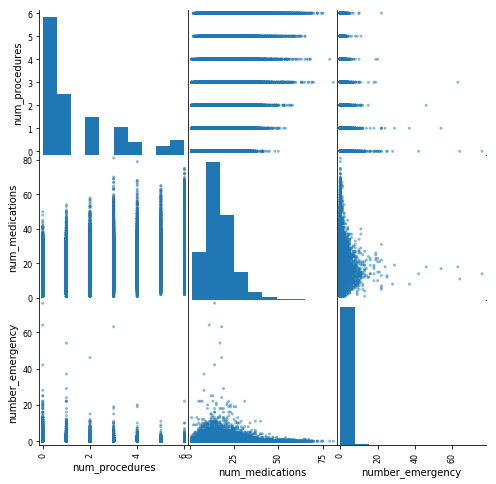

In [176]:

import seaborn as sns

sm = pd.plotting.scatter_matrix(datacopy[['num_procedures', 'num_medications', 'number_emergency']], figsize = (8, 8))
sns.despine()

___From the above, we can see that there is no problem of multi-collinearity. We can also see that as the number emergency increases the num medication decreases.___

_Let's try to see how the age and number of medicines vary_

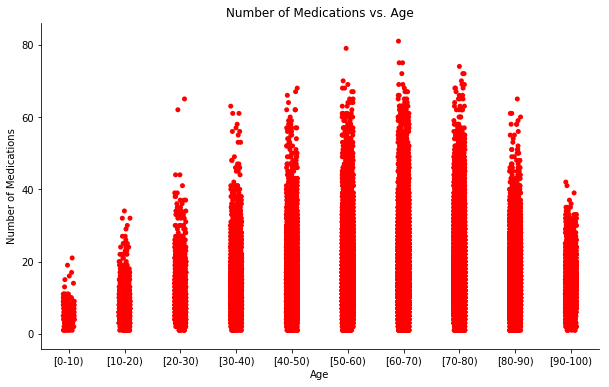

In [177]:
sortage = datacopy.sort_values(by = 'age')
x = sns.stripplot(x = "age", y = "num_medications", data = sortage, color = 'red')
sns.despine() #remove top and right axes
x.figure.set_size_inches(10, 6)
x.set_xlabel('Age')
x.set_ylabel('Number of Medications')
x.axes.set_title('Number of Medications vs. Age')
plt.show()

_Data makes sense as mid age is when people are diagonised with more health problems and its same in Diabetic patients also. Old people usually wont have enough immunity and hence medicine intake reduces as age increases._

___Lets check if Gender has anything to do with Readmissions___

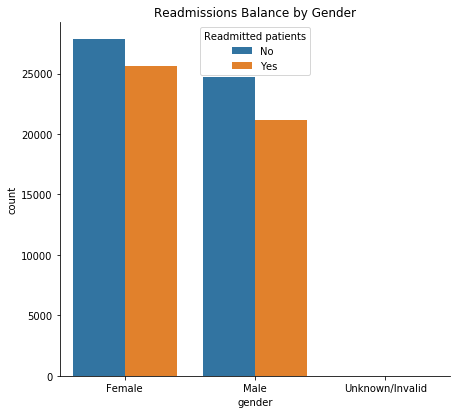

In [178]:
plot1 = sns.countplot(x = 'gender', hue = '30readmit', data = datacopy) 

sns.despine()
plot1.figure.set_size_inches(7, 6.5)
plot1.legend(title = 'Readmitted patients', labels = ('No', 'Yes'))
plot1.axes.set_title('Readmissions Balance by Gender')
plt.show()

_No Interesting facts as they both look propotional_

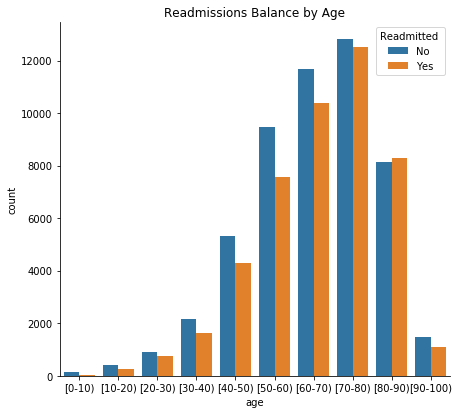

In [179]:
#Relation between age and readmission,

b = datacopy.age.unique()
b.sort()
b_sort = np.array(b).tolist()


ageplt = sns.countplot(x = 'age', hue = '30readmit', data = datacopy, order = b_sort) 

sns.despine()
ageplt.figure.set_size_inches(7, 6.5)
ageplt.legend(title = 'Readmitted ', labels = ('No', 'Yes'))
ageplt.axes.set_title('Readmissions Balance by Age')
plt.show()

___Intersting Fact! : We see that readmissions is proportional to age, readmissions increase as age increases!! People in the age bracket of 70-80 and 80-90 have a very high chance of Readmission!!___

_However people in 90-100 age bracket have lower readmission, also the records are less for such age brackets which makes sense as very few people have life expectency above 90. As we have removed dead person records, had we included those values we would had surely understood the disparity in this age bracket._

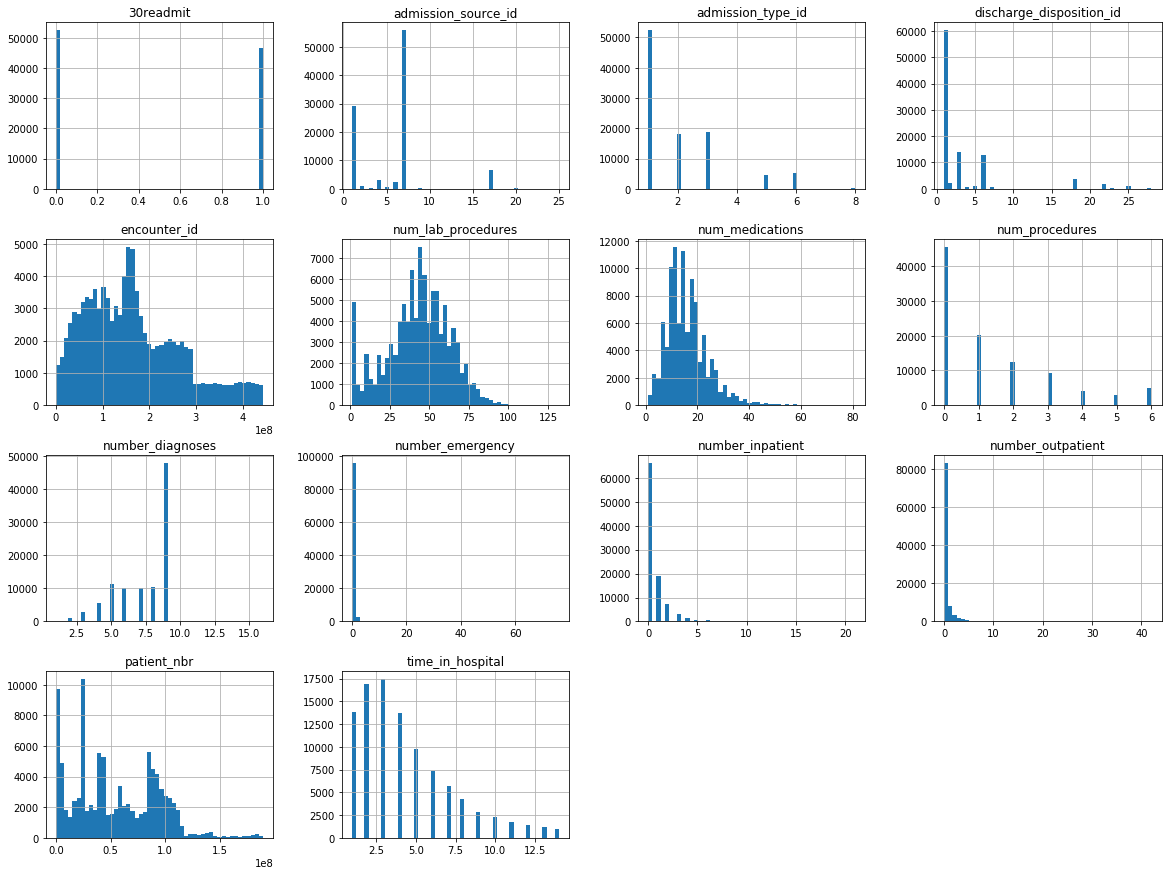

In [180]:
#Plotting the numerical variables in our dataset,

%matplotlib inline
import matplotlib.pyplot as plt
datacopy.hist(bins=50, figsize=(20,15))
plt.show()

- __time_in_hospital__ : We see most of the patients stay in hospital for 1-4 days with 2nd and 3rd the discharge day. Either to other heath care or home.


- __num_lab_procedures__ : On an average every admitted patient does either 1 or in the range 30-60 tests with most being 45!!


- __num_medications__ : We see that on average 5-20 medications are taken by patients when in hospital with 5-10 being most common.

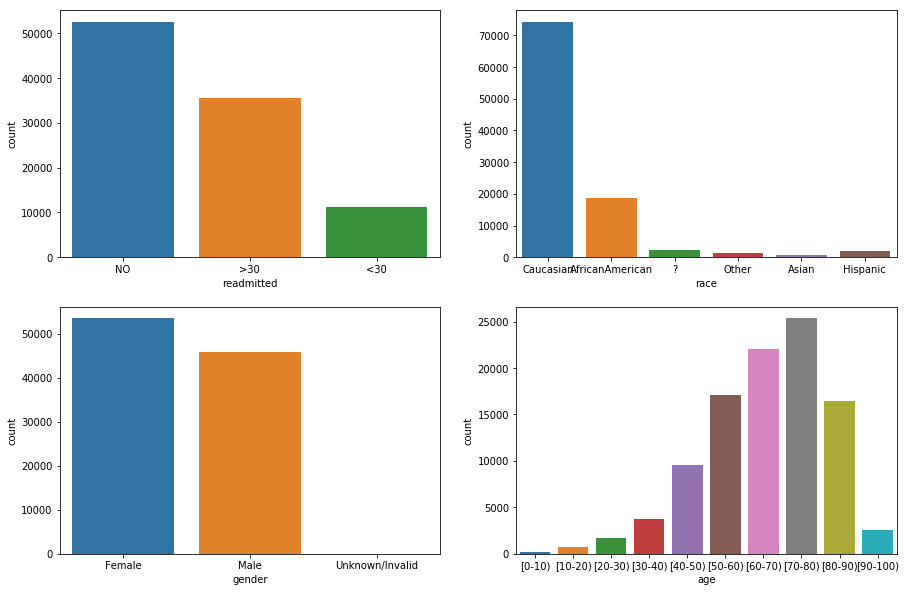

In [181]:
#Exploring the categorical variables,

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10), ncols=2, nrows=2)

sns.countplot(x="readmitted", data=datacopy, ax=ax[0][0])
sns.countplot(x="race", data=datacopy, ax=ax[0][1])
sns.countplot(x="gender", data=datacopy, ax=ax[1][0])
sns.countplot(x="age", data=datacopy, ax=ax[1][1])


- Caucasian/White have the highest number of cases at 75%, with African Americans coming Next with 23%.



- [60-70] and [70-80] age bracket is where most of the people get diagnosed with Diabetes.

# Prediction using ML Models

_Before applying logistic regression, we will have to make the data fit for performing logistic regression._

___Cleaning the data, replacing the null values in numeric data by 0 and object data by "unknown".___



In [182]:
numcolumn = datacopy.select_dtypes(include = [np.number]).columns
objcolumn = datacopy.select_dtypes(include = ['object']).columns

In [183]:
# Substituting 0 and unknown,

datacopy[numcolumn] = datacopy[numcolumn].fillna(0)
datacopy[objcolumn] = datacopy[objcolumn].fillna("unknown")

In [184]:
datacopy.head(2)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,30readmit
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,Up,No,No,No,No,No,Ch,Yes,>30,1


___Encoding the data from the mapping files we have___

In [185]:
def map_now():
    listname = [('infections', 139),
                ('neoplasms', (239 - 139)),
                ('endocrine', (279 - 239)),
                ('blood', (289 - 279)),
                ('mental', (319 - 289)),
                ('nervous', (359 - 319)),
                ('sense', (389 - 359)),
                ('circulatory', (459-389)),
                ('respiratory', (519-459)),
                ('digestive', (579 - 519)),
                ('genitourinary', (629 - 579)),
                ('pregnancy', (679 - 629)),
                ('skin', (709 - 679)),
                ('musculoskeletal', (739 - 709)),
                ('congenital', (759 - 739)),
                ('perinatal', (779 - 759)),
                ('ill-defined', (799 - 779)),
                ('injury', (999 - 799))]
    
    
    dictcout = {}
    count = 1
    for name, num in listname:
        for i in range(num):
            dictcout.update({str(count): name})  
            count += 1
    return dictcout
  

def codemap(df, codes):
    import pandas as pd
    namecol = df.columns.tolist()
    for col in namecol:
        temp = [] 
        for num in df[col]:           
            if ((num is None) | (num in ['unknown', '?']) | (pd.isnull(num))): temp.append('unknown')
            elif(num.upper()[0] == 'V'): temp.append('supplemental')
            elif(num.upper()[0] == 'E'): temp.append('injury')
            else: 
                lkup = num.split('.')[0]
                temp.append(codes[lkup])           
        df.loc[:, col] = temp               
    return df 


listcol = ['diag_1', 'diag_2', 'diag_3']
codes = map_now()
datacopy[listcol] = codemap(datacopy[listcol], codes)

c:\users\sanke\miniconda3\lib\site-packages\pandas\core\indexing.py:635: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


#### Now let's look at the dataset again and drop the irrelevant columns

In [186]:
datacopy.describe

<bound method NDFrame.describe of         encounter_id  patient_nbr             race  gender       age  \
0            2278392      8222157        Caucasian  Female    [0-10)   
1             149190     55629189        Caucasian  Female   [10-20)   
2              64410     86047875  AfricanAmerican  Female   [20-30)   
3             500364     82442376        Caucasian    Male   [30-40)   
4              16680     42519267        Caucasian    Male   [40-50)   
5              35754     82637451        Caucasian    Male   [50-60)   
6              55842     84259809        Caucasian    Male   [60-70)   
7              63768    114882984        Caucasian    Male   [70-80)   
8              12522     48330783        Caucasian  Female   [80-90)   
9              15738     63555939        Caucasian  Female  [90-100)   
10             28236     89869032  AfricanAmerican  Female   [40-50)   
11             36900     77391171  AfricanAmerican    Male   [60-70)   
12             40926     85504

#### Lets remove unnecessary features like 'encounter_id', "patient_nbr", 'admission_type_id','readmitted' (Target variable) to make a input dataset to be fed to the model?

In [187]:
data1 = datacopy.drop(['encounter_id', "patient_nbr", 'admission_type_id','readmitted'], axis =1) 

#### Data looks clean after removing unnecessary values 

In [188]:
data1.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,30readmit
0,Caucasian,Female,[0-10),25,1,1,41,0,1,0,...,No,No,No,No,No,No,No,No,No,0
1,Caucasian,Female,[10-20),1,7,3,59,0,18,0,...,No,Up,No,No,No,No,No,Ch,Yes,1
2,AfricanAmerican,Female,[20-30),1,7,2,11,5,13,2,...,No,No,No,No,No,No,No,No,Yes,0
3,Caucasian,Male,[30-40),1,7,2,44,1,16,0,...,No,Up,No,No,No,No,No,Ch,Yes,0
4,Caucasian,Male,[40-50),1,7,1,51,0,8,0,...,No,Steady,No,No,No,No,No,Ch,Yes,0


## Normalization of data

__Since different columns have different range of values, we will perfom normalization of numerical columns. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values.__

In [189]:
#Normalization of the data,

listnormal = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
                     'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

from sklearn.preprocessing import StandardScaler

normal = StandardScaler()

data1[listnormal] = normal.fit_transform(data1[listnormal])

data1.describe()

,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,30readmit
count,99343.000000,99343.000000,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,9.934300e+04,99343.000000
mean,3.517882,5.731083,6.894932e-17,-8.632969e-17,-4.756358e-17,1.773800e-17,-7.438515e-18,-5.650411e-17,-2.660700e-17,1.773800e-16,0.471256
std,5.184359,4.065029,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499176
min,1.000000,1.000000,-1.138438e+00,-2.137026e+00,-7.835647e-01,-1.850439e+00,-2.918627e-01,-2.116216e-01,-5.005746e-01,-3.298145e+00,0.000000
25%,1.000000,1.000000,-8.015554e-01,-6.071886e-01,-7.835647e-01,-7.386238e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,-7.221572e-01,0.000000
50%,1.000000,7.000000,-1.277904e-01,5.574070e-02,-1.962887e-01,-1.209485e-01,-2.918627e-01,-2.116216e-01,-5.005746e-01,3.082380e-01,0.000000
75%,3.000000,7.000000,5.459746e-01,7.186700e-01,3.909872e-01,4.967267e-01,-2.918627e-01,-2.116216e-01,2.928105e-01,8.234355e-01,1.000000
max,28.000000,25.000000,3.241035e+00,4.543262e+00,2.740091e+00,8.032365e+00,3.290615e+01,8.083523e+01,1.616051e+01,4.429819e+00,1.000000


## __Dealing with categorical variables__ 

__Lets use pandas get_dummies since we are doing a bottom up approach__


We can use Scklearns One Hot Encoder here too, but it has some cons too. Check out this [link](https://medium.com/@guaisang/handling-categorical-features-get-dummies-onehotencoder-and-multicollinearity-f9d473a40417)

#### Let's create readmitted(Target) in y and rest of the columns(Features) in X,


In [190]:
Y = data1['30readmit']
X = data1.drop(['30readmit'], axis =1)
X = pd.get_dummies(X)

##### Splitting the data into training and vallidation data sets. The training data will contain 80 % of the data and validation will contain remaining 20%

In [191]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = .2, 
                                                random_state = 7, stratify = Y)

In [192]:
print("shape of Xtrain,Xtest:",Xtrain.shape,Xtest.shape)

shape of Xtrain,Xtest: (79474, 169) (19869, 169)


# Logistic Regression

In [193]:
# create model logistic as logistic regression using Sklearn 
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression(tol=1e-7, penalty='l2', C=0.0005)
logisticreg.fit(Xtrain, Ytrain)
Ylog = logisticreg.predict(Xtest)

In [194]:
# Checking the accuracy of the model 
print(" The accuracy of the Logistic regression model:" ,logisticreg.score(Xtest, Ytest))

 The accuracy of the Logistic regression model: 0.6277115103930746


In [195]:
# checking the confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Ytest, Ylog))

[[8376 2130]
 [5267 4096]]


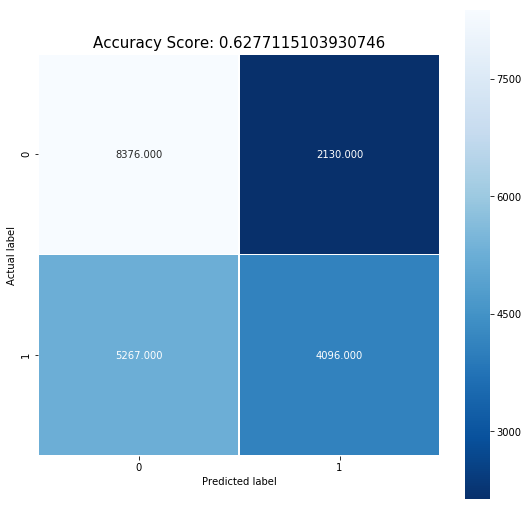

In [196]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Ylog), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logisticreg.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [197]:
# Checking the summary of classification
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ylog, target_names = ['NO', 'YES']))

             precision    recall  f1-score   support

         NO       0.61      0.80      0.69     10506
        YES       0.66      0.44      0.53      9363

avg / total       0.63      0.63      0.61     19869



In [198]:
# Checking the performance of model using ROC curve plots
YScre = logisticreg.decision_function(Xtest)

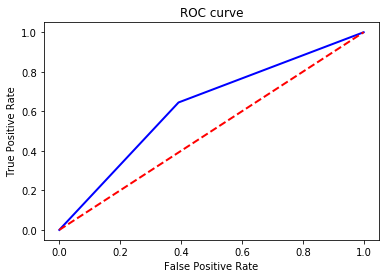

In [199]:
##Computing false and true positive rates
from sklearn.metrics import roc_curve

fpr, tpr,_=roc_curve(logisticreg.predict(Xtrain),Ytrain,drop_intermediate=False)

import matplotlib.pyplot as plt
plt.figure()
##Creating the ROC,
plt.plot(fpr, tpr, color='blue',
 lw=2, label='ROC curve')
##Finding FPR and TPR,
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
##Splecifying the label and title,
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

##### As seen from the above, the performance of our model is average, not too great. So, let's go ahead and see other models.

# Random Forest Classifier

In [200]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42,n_estimators=500)
random_forest.fit(Xtrain, Ytrain)
Yrandforest = random_forest.predict(Xtest)

In [201]:
#Calculating the score,
scorey =random_forest.predict_proba(Xtest)[:,1]
rfpr, rtpr, thresholds = roc_curve(Ytest, scorey)

In [202]:
#Checking the accuracy,

print(" Accuracy of Randomeforest classification: ", random_forest.score(Xtest, Ytest))

 Accuracy of Randomeforest classification:  0.6362675524686698


In [203]:
#Printing the confusion matrix,
print(confusion_matrix(Ytest, Yrandforest))

[[7559 2947]
 [4280 5083]]


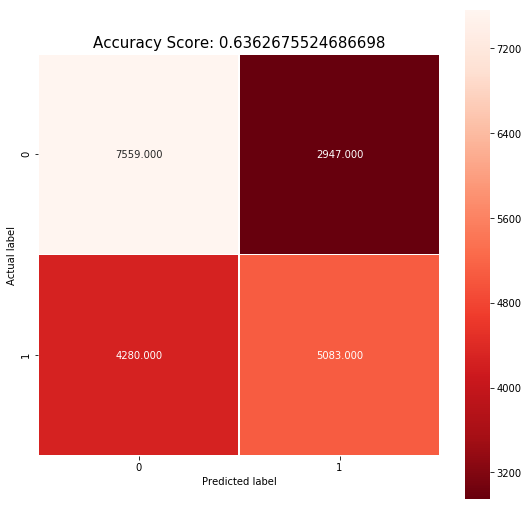

In [204]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, Yrandforest), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(random_forest.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [205]:
print(classification_report(Ytest, Yrandforest, target_names = ['NO', 'YES']))

             precision    recall  f1-score   support

         NO       0.64      0.72      0.68     10506
        YES       0.63      0.54      0.58      9363

avg / total       0.64      0.64      0.63     19869



# AdaBoosted Classification model

In [207]:
#Creating a AdaBoosted Classification model,
from sklearn.ensemble import AdaBoostClassifier
adaclass = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
adaclass.fit(Xtrain, Ytrain)
yadaclas = adaclass.predict(Xtest)

In [208]:
print("The accurary of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest))

The accurary of AdaBoosted Classification model:  0.6254466757260053


In [209]:
#Checking the confusion matrix,
print(confusion_matrix(Ytest, yadaclas))

[[8328 2178]
 [5264 4099]]


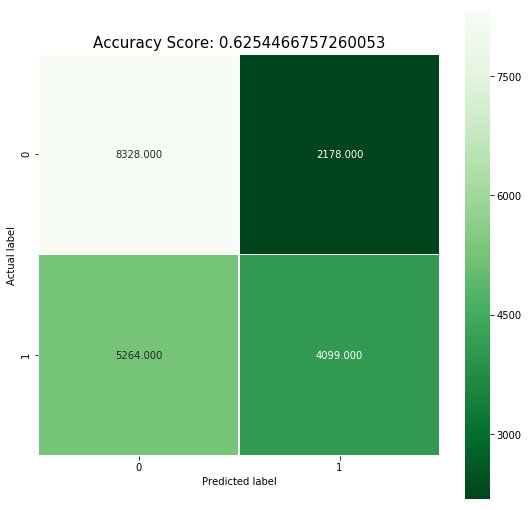

In [210]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix(Ytest, yadaclas), annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(adaclass.score(Xtest, Ytest))
plt.title(all_sample_title, size = 15);

In [211]:
#Checking recall, f1 :-
print(classification_report(Ytest, yadaclas, target_names = ['NO', 'YES']))

             precision    recall  f1-score   support

         NO       0.61      0.79      0.69     10506
        YES       0.65      0.44      0.52      9363

avg / total       0.63      0.63      0.61     19869



In [212]:
# calculate the False Positive and True Positive rate to get the ROC curve  
yadaclas = adaclass.decision_function(Xtest)
fpr_adaclass, tpr_adaclass, thresholds = roc_curve(Ytest, yadaclas)

# Comparing the models

In [213]:
fpr_log, tpr_log, thresholds = roc_curve(Ytest, YScre)#logistic regression
fpr_rf, tpr_rf, thresholds = roc_curve(Ytest, Yrandforest)#random forest classifier
fpr_adaclf, tpr_adaclf, thresholds = roc_curve(Ytest, yadaclas)#Ada boost classifier

c:\users\sanke\miniconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0,0.5,'True Positive Rate')

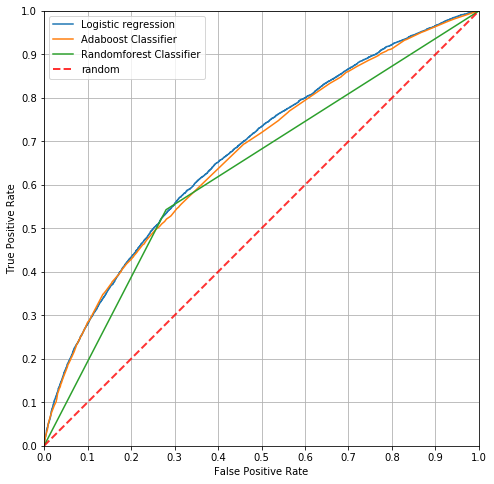

In [214]:
#compare the ROC curve between different models
plt.figure(figsize=(8,8))
plt.plot(fpr_log, tpr_log, label='Logistic regression')
plt.plot(fpr_adaclf, tpr_adaclf, label='Adaboost Classifier')
plt.plot(fpr_rf, tpr_rf, label='Randomforest Classifier')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='random', alpha=.8)
plt.xlim([0,1])
plt.ylim([0,1])
plt.xticks(np.arange(0,1.1,0.1))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid()
plt.legend()
plt.axes().set_aspect('equal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [215]:
print(" Accuracy of Logistic regression model:" ,logisticreg.score(Xtest, Ytest)*100)
print("Accuracy of Random forest classification: ", random_forest.score(Xtest, Ytest)*100)
print("Accuracy of AdaBoosted Classification model: ", adaclass.score(Xtest, Ytest)*100)

 Accuracy of Logistic regression model: 62.77115103930746
Accuracy of Random forest classification:  63.626755246866985
Accuracy of AdaBoosted Classification model:  62.54466757260053


### _Random forest gave better accuracy with ROC score of  0.63_ !!

### Understand which are the top features to which can help detect the Readmission for patients

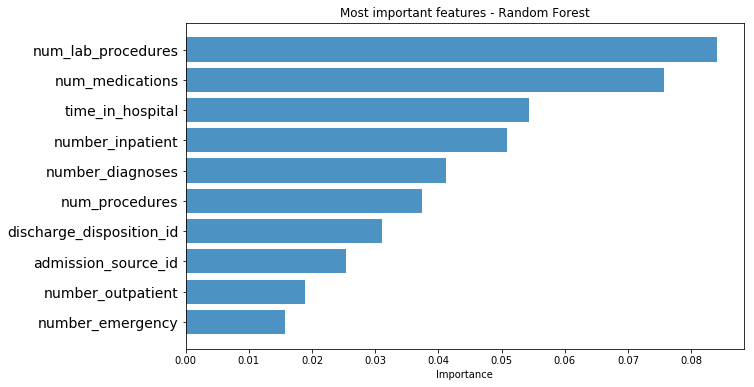

In [206]:
#Determining which features are most important,
feature_names = Xtrain.columns
feature_imports = random_forest.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest')
plt.show()

# Summary

1. From the above we can see that the accuracy levels of AdaBoost after tuning and Random forest is among the best, about 64%.
2. The accuracy of all the models are similar and ranges between 62-64%. Further, applying more pre-processing techniques
   might help. The dataset needs more data cleaning and data fitting to achieve a higher degree of accuracy.
3. Looking at the false positives and the recall value which is approx 60% in Random forest, it gives us better results than        the rest.
4. The above visual helps us in seeing the accuracy and the ROC curver further helps us decide the performance of different        models.